<a href="https://colab.research.google.com/github/NileshCT/Treatment_on_imbalanced_dataset/blob/main/Treatment_on_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
numeric_feature=df.describe().columns
numeric_feature

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Checking data is balanced or imbalanced.**

<Axes: >

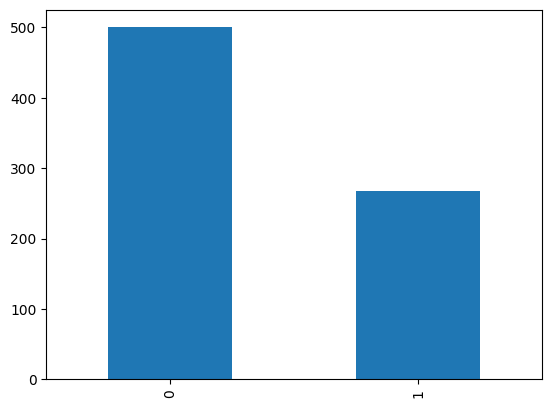

In [ ]:
df["Outcome"].value_counts().plot(kind="bar")

**various methods to deal with imbalanced data**


**1] Resampling (Oversampling and Undersampling)**

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
##oversampling method
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority=df[(df["Outcome"]==0)]
df_minority=df[(df["Outcome"]==1)]
#upsampling minority class
df_minority_upsampling=resample(df_minority,replace=True,n_samples=500,random_state=42)
df_upsampling=pd.concat([df_majority,df_minority_upsampling])
df_upsampling["Outcome"].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [ ]:
#Undersampling
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority=df[(df["Outcome"]==0)]
df_minority=df[(df["Outcome"]==1)]
df_majority_undersampling=resample(df_majority,replace=True,n_samples=268,random_state=42)
df_oversampling=pd.concat([df_majority_undersampling,df_minority])
df_oversampling["Outcome"].value_counts()

0    268
1    268
Name: Outcome, dtype: int64

**2]SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority', random_state=42)
X, y = oversample.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])
oversampled=pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
oversampled["Outcome"].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

**3]BalancedBaggingClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
preds

/usr/local/lib/python3.9/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

**4]Threshold moving**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)   
rf_model.predict_proba(X_test) #probability of the class label

array([[0.16, 0.84],
       [0.9 , 0.1 ],
       [0.93, 0.07],
       [0.47, 0.53],
       [0.86, 0.14],
       [0.99, 0.01],
       [0.18, 0.82],
       [0.12, 0.88],
       [0.66, 0.34],
       [0.54, 0.46],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.87, 0.13],
       [0.78, 0.22],
       [0.67, 0.33],
       [0.58, 0.42],
       [0.15, 0.85],
       [0.97, 0.03],
       [0.52, 0.48],
       [0.88, 0.12],
       [0.44, 0.56],
       [0.83, 0.17],
       [0.82, 0.18],
       [0.8 , 0.2 ],
       [0.97, 0.03],
       [0.64, 0.36],
       [0.95, 0.05],
       [0.13, 0.87],
       [0.96, 0.04],
       [0.89, 0.11],
       [0.62, 0.38],
       [0.73, 0.27],
       [0.8 , 0.2 ],
       [0.42, 0.58],
       [0.96, 0.04],
       [0.24, 0.76],
       [0.51, 0.49],
       [0.97, 0.03],
       [0.64, 0.36],
       [0.17, 0.83],
       [0.69, 0.31],
       [0.86, 0.14],
       [0.76, 0.24],
       [0.22, 0.78],
       [0.43, 0.57],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.83,